# Chapter 4: Training Models

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

### The Normal Equation

In [9]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now plot this.

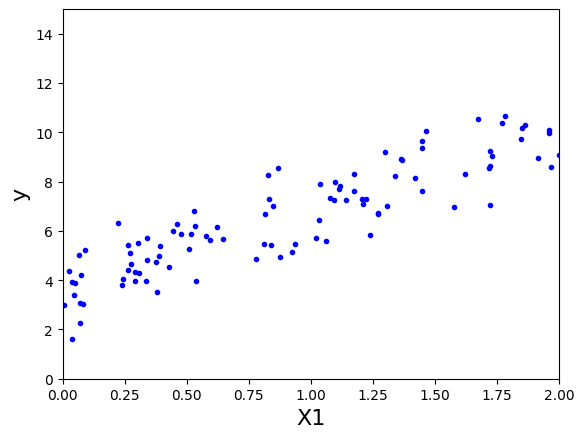

In [11]:
plt.plot(X, y, 'b.')
plt.xlabel('X1', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis([0, 2, 0, 15])
plt.show()

The above seems reasonable... but doesn't quite look like what the book has. I'll look at that.

Computer the Normal Equation.

In [12]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[3.70951901],
       [3.15627399]])

Expected it to be closer to \theta0 = 4 and \theta1 = 3. Somehow it's off. Likely because of the noise added.

Now let's make predictions.

In [26]:
X_new = np.array([[0], [2]])
# Why 'b'?
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.70951901],
       [10.02206699]])

Wow that was slow. Hm. Is that normal?

Hm... maybe it's not slow but the notebook takes a time to show it's done.

In [16]:
theta_best.shape

(2, 1)

In [17]:
X_new_b.shape

(2, 2)

In [20]:
X_new_b

array([[1., 0.],
       [1., 2.]])

Now let's plot the result.

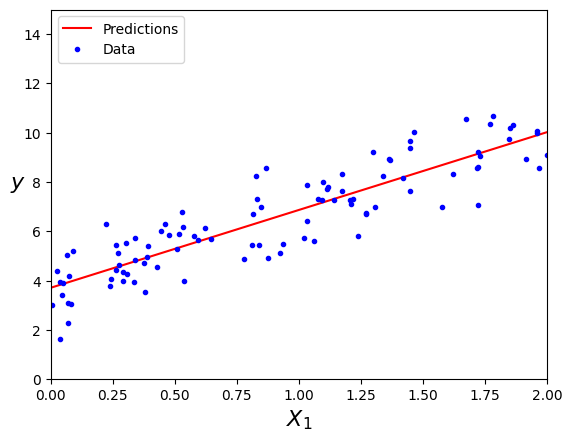

In [38]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Data")
plt.axis([0, 2, 0 , 15])
plt.xlabel("$X_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left")
plt.show()

Attempt a linear regression using Scikit-Learn.

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.70951901]), array([[3.15627399]]))

In [40]:
lin_reg.predict(X_new)

array([[ 3.70951901],
       [10.02206699]])

In [41]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.70951901],
       [3.15627399]])

In [42]:
np.linalg.pinv(X_b).dot(y)

array([[3.70951901],
       [3.15627399]])

All of this looks the same. Seems like different ways to come to the same result.